## Cost Model for Trip to New York! The idea is to minimize the amount of cost, and Maximize the amount of fun!

Goal: Trying to predict/approximate how our spending in NYC would be, so we can don't go too crazy with our spending, and have a good estimate on how much we are pouring in!

In [313]:
# import all the needed library.
import pandas as pd
import numpy as np
import arrow
import seaborn as sns
from datetime import datetime

%matplotlib inline

Defining on all the input we'd like!

In [318]:
# Global variables. Defining fixed cost/ goal.
# Currently fixated at 1050 per person.
Budget = 1050
# This is how much it costs to fly back and forth from SFO to NYC
Airfare_A = 140 + 268.2
# This is how much it costs to fly back and forth from OC to NYC
# TODO(alex): Ask J what is the actual fare for the flight
Airfare_J = 500
# How much waitress was per ticket.
Waitress_Price = 148.05
# Guestimate the approximate spending for housing.
Housing_Price_Per_Night = 125
Daily_Coffee = 4
Lunch_Cost = 10
Breakfast_Cost = 10 
Dinner_Cost = 20
Daily_Commute_Cost = 10
Nights_In_NYC = 5

In [319]:
# Define the constants that are set.
start = datetime(2017, 5, 24)
end = datetime(2017, 5, 29)
date_range = list()
for r in arrow.Arrow.range('day', start, end):
    date_range.append(str(r.format('YYYY-MM-DD')))

print date_range

['2017-05-24', '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29']


In [320]:
# Define Fixed Cost already:
Remaining_Budget = (Budget * 2) - Airfare_A - Airfare_J - (Waitress_Price * 2) - \
(Housing_Price_Per_Night * Nights_In_NYC)
print Remaining_Budget

270.7


In [321]:
df = pd.DataFrame(index=date_range,
                 columns=['BreakFast',
                          'Lunch',
                          'Dinner',
                          'Coffee',
                          'Commute'])
df.index.name = 'Date'
df = df.reset_index()

In [322]:
df['Coffee'] = Daily_Coffee
df['BreakFast'] = Breakfast_Cost
df['Lunch'] = Lunch_Cost
df['Dinner'] = Dinner_Cost
df['Commute'] = Daily_Commute_Cost

In [323]:
# Clean up the Data a bit: No breakfast lunch, dinner, coffee for the 24th, 
# and since we are leaving on the 29th morning, we can take out the lunch, dinner
df.loc[df['Date'].isin(['2017-05-24', '2017-05-29']),
       ['Coffee', 'Lunch', 'Dinner']] = 0
df.loc[df['Date'].isin(['2017-05-24']),  'BreakFast'] = 0

In [324]:
df

,Date,BreakFast,Lunch,Dinner,Coffee,Commute
0,2017-05-24,0,0,0,0,10
1,2017-05-25,10,10,20,4,10
2,2017-05-26,10,10,20,4,10
3,2017-05-27,10,10,20,4,10
4,2017-05-28,10,10,20,4,10
5,2017-05-29,10,0,0,0,10


Calculate how much we would spend on daily!

In [326]:
df['daily_spend'] = df.apply(lambda x: x['BreakFast'] + x['Lunch'] + \
                             x['Dinner'] + x['Coffee'] + x['Commute'], axis = 1)

In [327]:
df

,Date,BreakFast,Lunch,Dinner,Coffee,Commute,daily_spend
0,2017-05-24,0,0,0,0,10,10
1,2017-05-25,10,10,20,4,10,54
2,2017-05-26,10,10,20,4,10,54
3,2017-05-27,10,10,20,4,10,54
4,2017-05-28,10,10,20,4,10,54
5,2017-05-29,10,0,0,0,10,20


In [328]:
 Total_Spend = df['daily_spend'].sum()
print "We would spend in total: ${} living in NYC".format(Total_Spend)

We would spend in total: $246 living in NYC


In [329]:
budget_left_post_trip = Remaining_Budget - Total_Spend

In [330]:
budget_left_post_trip

24.699999999999932

## It looks like if we follow this spend behavior(or even less than what is estimated, we can really crank up a whole 5 days under 1k per person!) 

We even would have 24.69 dollars in remain xD



We can even make a linear equation on Budget to Housing Cost!

Technically, it is

Input_Budget = (2 X Budget) - Airfare_A - Airfare_J - (Waitress_Price * 2) - Total_Spend - ( 5 X Housing_Price_Per_Night)

In [331]:
def house_price_to_budget(house_price):
    Total_Budget = Airfare_A + Airfare_J + (Waitress_Price * 2)\
    + Total_Spend + (5 * house_price)
    return Total_Budget

In [332]:
h1 = 80
h2 = 100
h3 = 130

b1 = house_price_to_budget(h1)
b2 = house_price_to_budget(h2)
b3 = house_price_to_budget(h3)

In [333]:
# Let's see what it looks like in a line graph!
budget_df = pd.DataFrame({'house_price': [h1,h2,h3],
                          'budget': [b1,b2,b3]})
print budget_df

   budget  house_price
0  1850.3           80
1  1950.3          100
2  2100.3          130


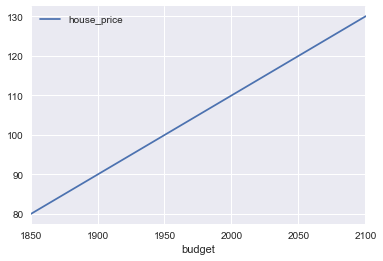

In [334]:
budget_df.plot.line(x='budget',
                   y='house_price')

Hope this is helpful to determine how much we'd want to spend for daily house rental!